# Курсовой проект: сравнение половозростного состава Багратионовской области 

In [154]:
import pandas as pd
import numpy as np
#https://python-school.ru/blog/pandas-excel/

In [155]:
population = pd.read_excel('./Багратионовск.xlsx', usecols=['Возраст (лет)', 'Unnamed: 2', 'Unnamed: 3'])
population.head()

,Возраст (лет),Unnamed: 2,Unnamed: 3
0,NaN,мужчины,женщины
1,А,2,3
2,Все население,16152,16661
3,0,141,137
4,1,167,151


In [156]:
pd.set_option('display.max_rows', None)
#population
#нужно знать индексы строк, которые надо убрать, с огромными БД не пркатит
#0, 1, 2, 8, 14, 20, 26, 32, 38, 44, 50, 56, 62, 68, 74, 80, 86

In [157]:
population.all()

Возраст (лет)    True
Unnamed: 2       True
Unnamed: 3       True
dtype: bool

In [158]:
m = 3
#3 столбца мж, м, ж и n строк, означающих возраст
n = len(population) - 4 #первые 3 строки - категории, 4я - общее число жителей
n

84

In [159]:
print(population.columns.ravel())

['Возраст (лет)' 'Unnamed: 2' 'Unnamed: 3']


In [160]:
#print(population['Возраст (лет)'].tolist())

In [161]:
population_all = np.array(population['Возраст (лет)'])
population_all

array([nan, 'А', 'Все население', '0', '1', '2', '3', '4', '0-4', '5',
       '6', '7', '8', '9', '5-9', '10', '11', '12', '13', '14', '10-14',
       '15', '16', '17', '18', '19', '15-19', '20', '21', '22', '23',
       '24', '20-24', '25', '26', '27', '28', '29', '25-29', '30', '31',
       '32', '33', '34', '30-34', '35', '36', '37', '38', '39', '35-39',
       '40', '41', '42', '43', '44', '40-44', '45', '46', '47', '48',
       '49', '45-49', '50', '51', '52', '53', '54', '50-54', '55', '56',
       '57', '58', '59', '55-59', '60', '61', '62', '63', '64', '60-64',
       '65', '66', '67', '68', '69', '65-69', '70 лет и старше'],
      dtype=object)

In [162]:
population_all = np.delete(population_all, (0,1,2,8,14,20,26,32,38,44,50,56,62,68,74,80,86), axis = 0)
#population_all

In [163]:
n = len(population_all)
n

71

In [164]:
Men = np.array(population['Unnamed: 2'])
Women = np.array(population['Unnamed: 3'])

In [165]:
Men = np.delete(Men, (0,1,2,8,14,20,26,32,38,44,50,56,62,68,74,80,86), axis = 0)
Women = np.delete(Women, (0,1,2,8,14,20,26,32,38,44,50,56,62,68,74,80,86), axis = 0)

In [166]:
population_all, Men, Women

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
        '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
        '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
        '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
        '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
        '68', '69', '70 лет и старше'], dtype=object),
 array([141, 167, 193, 187, 251, 227, 239, 274, 270, 249, 228, 203, 207,
        155, 170, 192, 167, 179, 181, 208, 179, 181, 220, 184, 186, 208,
        171, 226, 187, 143, 190, 235, 279, 284, 336, 323, 307, 278, 295,
        307, 339, 287, 270, 263, 271, 281, 278, 273, 229, 228, 202, 223,
        193, 191, 194, 185, 182, 219, 184, 222, 223, 236, 212, 202, 207,
        172, 170, 128, 159, 141, 781], dtype=object),
 array([137, 151, 166, 196, 222, 228, 265, 241, 243, 249, 221, 214, 207,
       

In [167]:
n1 = len(Men)
n2 = len(Women)
n = n1 + n2
n

142

In [168]:
k = 2

In [169]:
Men_mean = np.mean(Men)
Women_mean = np.mean(Women)
Men_mean, Women_mean

(227.49295774647888, 234.66197183098592)

Женщин в среднем больше

In [170]:
m_w = np.concatenate([Men, Women])
m_w_mean = np.mean(m_w)
m_w_mean

231.07746478873239

In [171]:
s2 = np.sum((m_w - m_w_mean)**2)
s2

3040688.147887323

In [172]:
s2_f = ((Men_mean - m_w_mean)**2) * n1 + ((Women_mean - m_w_mean)**2) * n2
s2_f

1824.5140845070414

In [173]:
s2_ost = ((Men - Men_mean)**2).sum() + ((Women - Women_mean)**2).sum() 
s2_ost

3038863.6338028167

In [174]:
s2_f + s2_ost

3040688.147887324

примерно равны квадрату отклонений, птм продолжаем

In [175]:
sigma2_general = s2 / (n - 1)
sigma2_general

21565.164169413638

sigma2_f = s2_f / (k - 1)
sigma2_f

In [176]:
sigma2_ost = s2_ost / (n - k)
sigma2_ost

21706.168812877262

In [177]:
F_h = sigma2_f / sigma2_ost
F_h

0.08405509513151127

#k1 = 2 т.к. у нас 2 группы k2= n - m - 1 = 71 - 2 - 1 = 68
https://univer-nn.ru/econometrica/Fisher-Student-table.pdf
3.13 по таблице
Наденное значение Фишера больше табличного. Данные статистически ненадежны.

In [178]:
eta2 = s2_f / s2
print(f'эмпирическое корреляционное отношение {eta2}')

эмпирическое корреляционное отношение 0.0006000332805502326


очень маленькое значение, поэтому различие роста является статистически незначимым

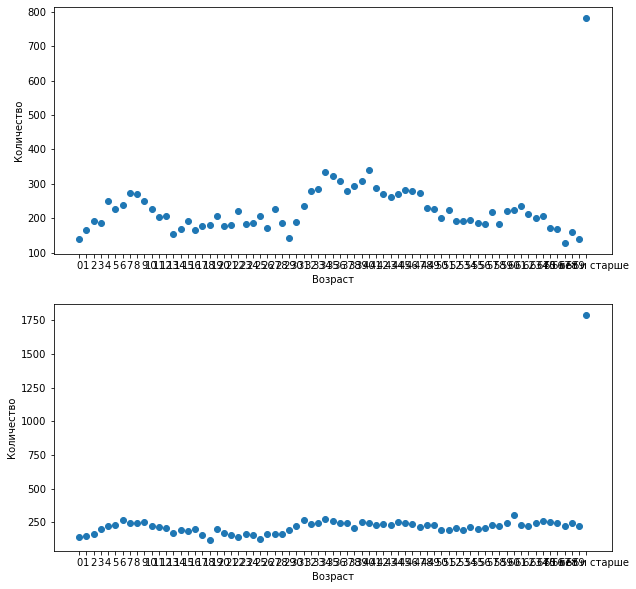

In [185]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#plt.scatter(Men, Women, color=['blue', 'red'])
#ax.scatter(x = population_all, y = [Men, Women])
#plt.xlabel('Количество')
#plt.ylabel('Возраст')

fig, ax = plt.subplots(2, figsize=(10, 10))
ax[0].scatter(x = population_all, y = Men)
ax[0].set_xlabel("Возраст")
ax[0].set_ylabel("Количество")

ax[1].scatter(x = population_all, y = Women)
ax[1].set_xlabel("Возраст")
ax[1].set_ylabel("Количество")

plt.show()

Вывод: женщин старше 70 лет в два раза больше чем мужчин, и женщины по возрастам распределены равномерно, а мужчины после 35 в количестве уменьшаются